<a href="https://colab.research.google.com/github/Anjasfedo/Learning-TensorFlow/blob/main/eat_tensorflow2_in_30_days/Chapter5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5-1 Dataset

All the data could be read into memory for training to maximize the efficiency, if the volume of training data is small (r.g. < 1gb).

However, if the data volume is huge (e.g. > 10gb) which is not possible to load everything into the memory, they should be devided into bathces before reading.

The API `tf.data` construct input data pipeline to help manage huge volume of data with various formats and coversions.

## 1. Constructuing Data Pipeline

Data pipeline could be constructed through followin methods:
- numpy array
- pandas DataFrame
- Python generator
- CSV file
- text file
- file path
- tfrecords file

Among these methods, the most popular ones are: numpy array, pandas DataFrame, and file path.

The drawback of using tfrecords file to construct data pipelines is its complication, since it requires:
- construct `tf.Example` from samples
- compress `tf.Example` into string and write it to tfrecords file
- when using these data, the tfrecords file have to be read and analyzed into `tf.Example`.

On the other hand, the advantage of using tfrecords files is its small volume after compression, its convenient sharing through the internet, and the fast speed of loading.

### 1.1 Constructuing Data Pipeline through Numpy Array

In [1]:
import tensorflow as tf
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()

In [4]:
ds_1 = tf.data.Dataset.from_tensor_slices((iris['data'], iris['target']))

for features, label in ds_1.take(5):
    print(features, label)

tf.Tensor([5.1 3.5 1.4 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([4.9 3.  1.4 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([4.7 3.2 1.3 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([4.6 3.1 1.5 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([5.  3.6 1.4 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int64)


### 1.2 Constructing Data Pipeline through Pandas Dataframe

In [3]:
import tensorflow as tf
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()

In [6]:
df_iris = pd.DataFrame(iris['data'], columns=iris['feature_names'])
ds_2 = tf.data.Dataset.from_tensor_slices((df_iris.to_dict('list'), iris['target']))

for features, label in ds_2.take(5):
    print(features, label)

{'sepal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=5.1>, 'sepal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=3.5>, 'petal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=1.4>, 'petal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=0.2>} tf.Tensor(0, shape=(), dtype=int64)
{'sepal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=4.9>, 'sepal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=3.0>, 'petal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=1.4>, 'petal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=0.2>} tf.Tensor(0, shape=(), dtype=int64)
{'sepal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=4.7>, 'sepal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=3.2>, 'petal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=1.3>, 'petal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=0.2>} tf.Tensor(0, shape=(), dtype=int64)
{'sepal length (cm)': <tf.Tensor: shape=(), dtype=float

### 1.3 Constructing Data Pipeline through Python generator

In [7]:
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
# Download Dataset
!git clone https://github.com/lyhue1991/eat_tensorflow2_in_30_days

Cloning into 'eat_tensorflow2_in_30_days'...
remote: Enumerating objects: 14635, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 14635 (delta 8), reused 8 (delta 4), pack-reused 14617
Receiving objects: 100% (14635/14635), 59.88 MiB | 20.86 MiB/s, done.
Resolving deltas: 100% (13241/13241), done.
Updating files: 100% (12529/12529), done.


In [9]:
# Define generator to read image from a folder
image_generator = ImageDataGenerator(rescale=1/255).flow_from_directory(
                  '/content/eat_tensorflow2_in_30_days/data/cifar2/test',
                  target_size=(32, 32),
                  batch_size=20,
                  class_mode='binary'
                  )

Found 2000 images belonging to 2 classes.


In [10]:
class_indices = image_generator.class_indices
print(class_indices)

{'airplane': 0, 'automobile': 1}


In [13]:
def generator():
  for features, label in image_generator:
    yield (features, label)

In [14]:
ds_3 = tf.data.Dataset.from_generator(generator, output_types=(tf.float32, tf.int32))

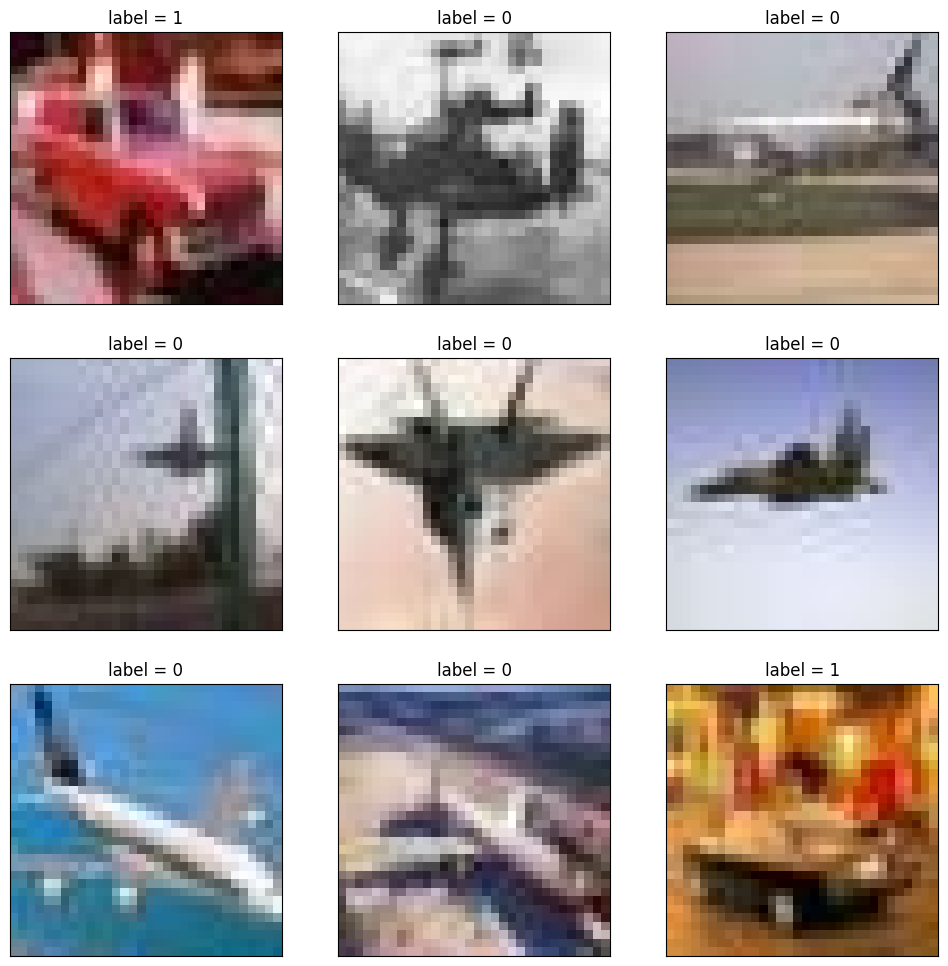

In [15]:
plt.figure(figsize=(12, 12))
for i, (img, label) in enumerate(ds_3.unbatch().take(9)):
    ax = plt.subplot(3, 3, i + 1)
    ax.imshow(img.numpy())
    ax.set_title("label = %d" % label)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

### 1.4 Constructing Data Pipeline through CSV file

In [18]:
ds_4 = tf.data.experimental.make_csv_dataset(
    file_pattern=['/content/eat_tensorflow2_in_30_days/data/titanic/train.csv', '/content/eat_tensorflow2_in_30_days/data/titanic/test.csv'],
    batch_size=3,
    label_name='Survived',
    na_value='',
    num_epochs=1,
    ignore_errors=True
)

In [20]:
for data, label in ds_4.take(2):
    print(data, label)

OrderedDict([('PassengerId', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 10, 475,  71], dtype=int32)>), ('Pclass', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 3, 2], dtype=int32)>), ('Name', <tf.Tensor: shape=(3,), dtype=string, numpy=
array([b'Nasser, Mrs. Nicholas (Adele Achem)',
       b'Strandberg, Miss. Ida Sofia', b'Jenkin, Mr. Stephen Curnow'],
      dtype=object)>), ('Sex', <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'female', b'female', b'male'], dtype=object)>), ('Age', <tf.Tensor: shape=(3,), dtype=float32, numpy=array([14., 22., 32.], dtype=float32)>), ('SibSp', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 0, 0], dtype=int32)>), ('Parch', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 0, 0], dtype=int32)>), ('Ticket', <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'237736', b'7553', b'C.A. 33111'], dtype=object)>), ('Fare', <tf.Tensor: shape=(3,), dtype=float32, numpy=array([30.0708,  9.8375, 10.5   ], dtype=float32)>), ('Cabin', <

### 1.5 Constructing Data Pipeline through text file

In [22]:
ds_5 = tf.data.TextLineDataset(filenames=['/content/eat_tensorflow2_in_30_days/data/titanic/train.csv', '/content/eat_tensorflow2_in_30_days/data/titanic/test.csv']) \
        .skip(1) # ommiting the header on the first lane

In [23]:
for line in ds_5.take(2):
  print(line)

tf.Tensor(b'493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5,C30,S', shape=(), dtype=string)
tf.Tensor(b'53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C', shape=(), dtype=string)


### 1.6 Constructing Data Pipeline through file path

In [24]:
ds_6 = tf.data.Dataset.list_files('/content/eat_tensorflow2_in_30_days/data/cifar2/train/*/*.jpg')

In [25]:
for file in ds_6.take(2):
  print(file)

tf.Tensor(b'/content/eat_tensorflow2_in_30_days/data/cifar2/train/automobile/3425.jpg', shape=(), dtype=string)
tf.Tensor(b'/content/eat_tensorflow2_in_30_days/data/cifar2/train/airplane/1673.jpg', shape=(), dtype=string)


In [26]:
def load_image(img_path, size=(32, 32)):
  label = 1 if tf.strings.regex_full_match(img_path, '.*automobile.*') else 0
  img = tf.io.read_file(img_path)
  img = tf.image.decode_jpeg(img) # to jpeg format
  img = tf.image.resize(img, size)
  return (img, label)

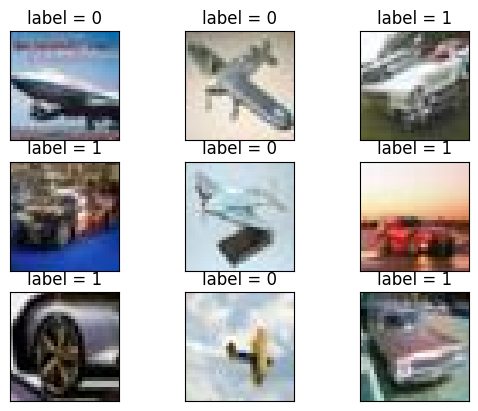

In [28]:
from matplotlib import pyplot as plt

for i, (img, label) in enumerate(ds_6.map(load_image).take(9)):
  ax = plt.subplot(3, 3, i + 1)
  ax.imshow((img/255.0).numpy())
  ax.set_title("label = %d" % label)
  ax.set_xticks([])
  ax.set_yticks([])

## 1.7 Constructing Data Pipeline through tfrecords file

In [53]:
import os
import numpy as np

# Inpath is the original data path
# Outpath is output path of the TFRecord file
def create_tfrecords(inpath,outpath):
  writer = tf.io.TFRecordWriter(outpath)
  dirs = os.listdir(inpath)
  for index, name in enumerate(dirs):
      class_path = inpath + '/' + name+ '/'
      for img_name in os.listdir(class_path):
          img_path = class_path + img_name
          img = tf.io.read_file(img_path)
          #img = tf.image.decode_image(img)
          #img = tf.image.encode_jpeg(img) # Use jpeg format for all the compressions
          example = tf.train.Example(
             features=tf.train.Features(feature={
                  'label': tf.train.Feature(int64_list=tf.train.Int64List(value=[index])),
                  'img_raw': tf.train.Feature(bytes_list=tf.train.BytesList(value=[img.numpy()]))
             }))
          writer.write(example.SerializeToString())
  writer.close()

create_tfrecords('/content/eat_tensorflow2_in_30_days/data/cifar2/test', '/content/cifar2_test.tfrecords/')

In [54]:
def parse_example(proto):
  description = {
      'label': tf.io.FixedLenFeature([], tf.int64),
      'img_raw': tf.io.FixedLenFeature([], tf.string)
  }

  example = tf.io.parse_single_example(proto, description)
  img = tf.image.decode_jpeg(example['img_raw']) # jpeg format
  img = tf.image.resize(img, [32, 32])
  label = example['label']

  return (img, label)

In [55]:
ds_7 = tf.data.TFRecordDataset('/content/cifar2_test.tfrecords') \
        .map(parse_example) \
        .shuffle(buffer_size=3000)

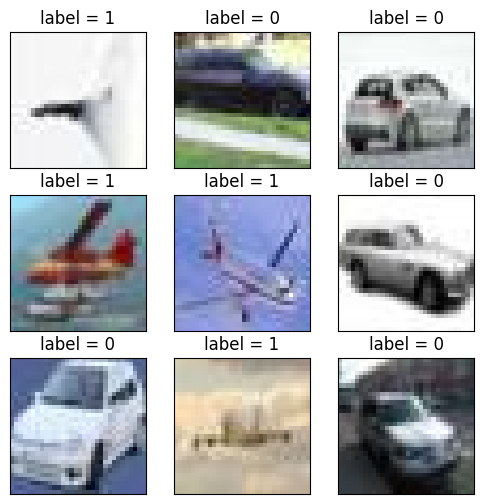

In [56]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6, 6))
for i,(img,label) in enumerate(ds_7.take(9)):
  ax=plt.subplot(3, 3, i + 1)
  ax.imshow((img/255.0).numpy())
  ax.set_title("label = %d"%label)
  ax.set_xticks([])
  ax.set_yticks([])
plt.show()